# Counterfactual Regret Minimization Examples

Guy Davidson
CS152 - Professor Rohan Shekhar
2017-12-14

This notebook contains a few examples relating to my final project regarding Counterfactual Regret Minimization (CFR). This includes both the examples of the playable agents, and 

## Setup

In [15]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..')))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import ImageGrid

from datetime import datetime, date
import timeit
import tabulate
import time
import glob


timeit.template = """
def inner(_it, _timer{init}):
    {setup}
    _t0 = _timer()
    for _i in _it:
        retval = {stmt}
    _t1 = _timer()
    return _t1 - _t0, retval
"""

matplotlib.style.use('ggplot')
RANDOM_SEED = 33

## Play against the AI

### Ace-Deuce Poker

only A-2, two rounds of cards, both private, one chip ante, betting of one chip after each round, pairs beat individual cards, pair of A's beats pair of 2's

In [17]:
from ace_deuce_poker import *

SAVED_AD_TRAINER_PATH = 'ad_trainer.pickle'
NUM_ROUNDS = 10

ad_trainer = load_trainer(SAVED_AD_TRAINER_PATH)
ad_trainer.play(NUM_ROUNDS)

You will start this round

Game history: Dealt (A)
Action options: pass (p), bet (b)


KeyboardInterrupt: 

### Leduc Poker

J-Q-K, two rounds of cards, first private, second communal, betting of one chip after each round, pair or high card wins (deck includes two of each card, so no way for both players to have pairs)

In [35]:
from leduc_poker import *

SAVED_LEDUC_TRAINER_PATH = 'leduc_trainer.pickle'
NUM_ROUNDS = 10

leduc_trainer = load_trainer(SAVED_LEDUC_TRAINER_PATH)
leduc_trainer.play(NUM_ROUNDS)

The AI will start this round

Game history: Dealt (Q)
The AI chose to bet

Game history: Dealt (Q), bet (AI)
Action options: pass (p), bet (b)


KeyboardInterrupt: 

## Train an AI

For example, for Leduc poker, and plot the rate of convergence with and without CFR+

In [36]:
TRAIN_ROUNDS = int(1e5)

l_trainer = LeducPokerCFRTrainer()
l_trainer.train(TRAIN_ROUNDS, num_prints=1)

After 0 iterations, average utility = 0.641


In [38]:
l_cfr_plus_trainer = LeducPokerCFRTrainer(True)
l_cfr_plus_trainer.train(TRAIN_ROUNDS, num_prints=1)

After 0 iterations, average utility = 0.422


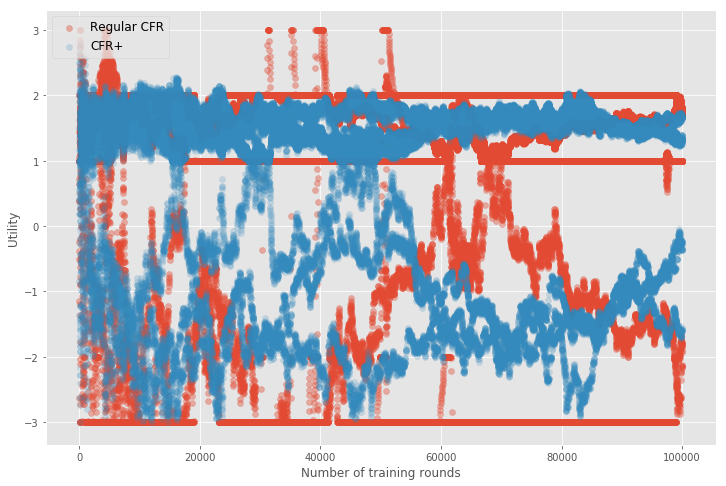

In [39]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()

ax.scatter(range(1, TRAIN_ROUNDS + 1), 
           l_trainer.utility_history, 
           label='Regular CFR', alpha=0.4)
ax.scatter(range(1, TRAIN_ROUNDS + 1), 
           l_cfr_plus_trainer.utility_history, 
           label='CFR+', alpha=0.2)

ax.legend(loc=2, fontsize=12)
ax.set_xlabel('Number of training rounds', size=12)
ax.set_ylabel('Utility', size=12)

plt.show()

In [ ]:
fig = plt.figure(figsize=(16, 12))
gs = gridspec.GridSpec(2, 2, hspace=0.1)


top_left_ax = plt.subplot(gs[0, 0])    
top_left_ax.scatter(range(1, TRAIN_ROUNDS + 1), 
                    l_cfr_plus_trainer.utility_history, 
                    label='Regular CFR', alpha=0.2, s=1)
top_left_ax.set_title('Individual round utility - CFR')

top_right_ax = plt.subplot(gs[0, 1])
top_right_ax.scatter(range(1, TRAIN_ROUNDS + 1), 
                     l_cfr_plus_trainer.utility_history, 
                     color='blue', alpha=0.1, s=1)
top_right_ax.set_title('Individual round utility - CFR+')

def running_average(data):
    avg = [data[0]]
    for i, d in enumerate(data):
        if i == 0:
            continue
            
        avg.append((avg[-1] * i + d) / (i + 1))
        
    return avg
        
regular_running_average = running_average(ace_deuce_trainer.utility_history)
cfr_plus_running_average = running_average(ace_deuce_cfr_plus_trainer.utility_history)
    
bottom_left_ax = plt.subplot(gs[1, 0])
bottom_left_ax.plot(range(1, TRAIN_ROUNDS + 1), 
                    regular_running_average,
                    label='Regular CFR')
bottom_left_ax.plot(range(1, TRAIN_ROUNDS + 1), 
                    cfr_plus_running_average, 
                    label='CFR+')
bottom_left_ax.set_title('Average utility')    

ZOOMED_MAX = int(4e4)

bottom_right_ax = plt.subplot(gs[1, 1])
bottom_right_ax.plot(range(1, ZOOMED_MAX + 1), 
                    regular_running_average[:ZOOMED_MAX],
                    label='Regular CFR')
bottom_right_ax.plot(range(1, ZOOMED_MAX + 1), 
                    cfr_plus_running_average[:ZOOMED_MAX], 
                    label='CFR+')
bottom_right_ax.set_title('Running Average utility - zoomed in')    
bottom_right_ax.set_ylim((0, 0.75))

plt.show()